In [15]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import json
import seaborn as sns
import pandas as pd

In [16]:
target = 'Van Gogh'
root_erase = '../results/results_seed_0/stable-diffusion/CompVis/stable-diffusion-v1-4/Van Gogh/concept-prune/benchmarking/concept_erase/'
root_coco = '../results/results_seed_0/stable-diffusion/CompVis/stable-diffusion-v1-4/Van Gogh/concept-prune/benchmarking/eval_coco/'
k_range = [0.005, 0.01, 0.02, 0.025, 0.03, 0.04, 0.05, 0.075]
t = 10
template_erase = 'clip_scores_skill_ratio_%s_timesteps_%s_threshold0.0.json'
template_coco = 'skill_ratio_%s_timesteps_%s_threshold0.0_results.json'

In [17]:

erasing_sim = []
for k in k_range:
    path = os.path.join(root_erase, template_erase % (k, t))
    with open(os.path.join(path), 'r') as f:
        results = json.load(f)
    print(f't_{t}_k_{k}', results['avg_similarity'])
    erasing_sim.append(results['avg_similarity'])

t_10_k_0.005 0.3286901718378067
t_10_k_0.01 0.29837844252586365
t_10_k_0.02 0.2693154004216194
t_10_k_0.025 0.25555223256349563
t_10_k_0.03 0.2485773369669914
t_10_k_0.04 0.24057141035795213
t_10_k_0.05 0.2301153150200844
t_10_k_0.075 0.20845185548067094


In [18]:

coco_sim = []
for k in k_range:
    path = os.path.join(root_coco, template_coco % (k, t))
    with open(os.path.join(path), 'r') as f:
        results = json.load(f)
    print(f't_{t}_k_{k}', results['average_similarity']/16.0)
    coco_sim.append(results['average_similarity']/16.0)

t_10_k_0.005 0.30491485708625987
t_10_k_0.01 0.30319238995434716
t_10_k_0.02 0.30162162068882026
t_10_k_0.025 0.29988088630489074
t_10_k_0.03 0.29815105971647426
t_10_k_0.04 0.2937859785743058
t_10_k_0.05 0.2916582664765883
t_10_k_0.075 0.28504523303126916


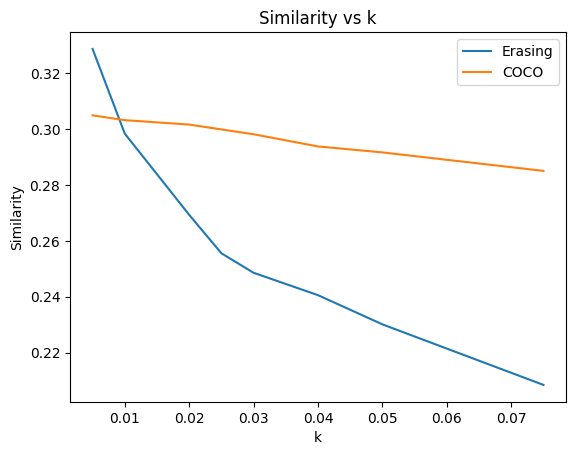

In [30]:
# plot similarity vs k
plt.plot(k_range, erasing_sim, label='Erasing')
plt.plot(k_range, coco_sim, label='COCO')
plt.xlabel('k')
plt.ylabel('Similarity')
plt.title('Similarity vs k')
plt.legend()
plt.show()

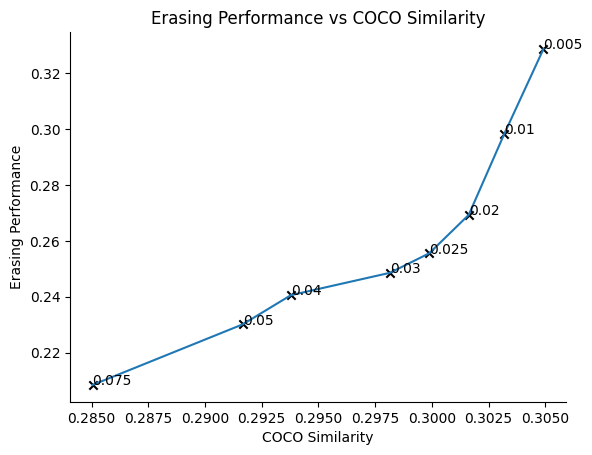

In [31]:
# plot erasing similarity vs coco similarity
plt.plot(coco_sim, erasing_sim, linestyle='-')
plt.scatter(coco_sim, erasing_sim, marker='x', color='black')

baseline_sim = 4.8899419/16.0
# annotate points
for i, txt in enumerate(k_range):
    plt.annotate(txt, (coco_sim[i], erasing_sim[i]))

plt.xlabel('COCO Similarity')
plt.ylabel('Erasing Performance')
plt.title('Erasing Performance vs COCO Similarity')
# remove borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


<Figure size 1300x1000 with 0 Axes>

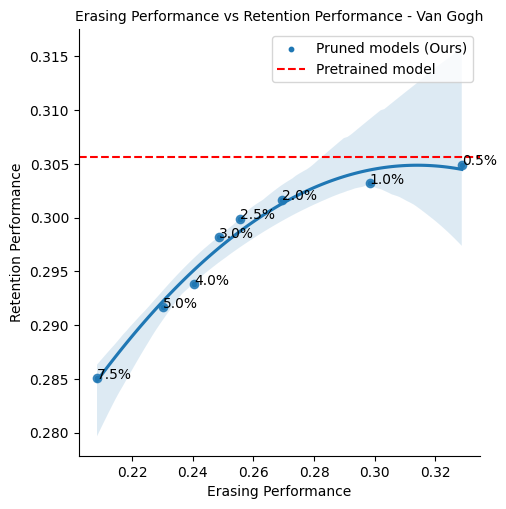

In [19]:
        
plt.figure(figsize=(13, 10))
# plt.subplots_adjust(top=0.85)
# sort the data ssc and clip score    

baseline_sim = 4.8899419/16.0

plot_data = pd.DataFrame({'coco': coco_sim, 'erasing': erasing_sim})
plot_sns=sns.lmplot(x='erasing', y='coco', data=plot_data, order=2)
plt.scatter(erasing_sim, coco_sim, marker='o', label='Pruned models (Ours)', s=10)
plot_sns.ax.set_xlabel('Erasing Performance', fontsize=10)
plot_sns.ax.set_ylabel('Retention Performance', fontsize=10)
plot_sns.ax.set_title('Erasing Performance vs Retention Performance - Van Gogh', fontsize=10)

for i, txt in enumerate(k_range):
    plt.annotate(str(txt*100.0)+ '%', (erasing_sim[i], coco_sim[i]))

# mark baseline sim with a horizontal line
plt.axhline(y=baseline_sim, color='r', linestyle='--', label='Pretrained model')
plot_sns.ax.legend()
plot_sns.ax.spines['top'].set_visible(False)
plot_sns.ax.spines['right'].set_visible(False)
# plt.show()
plt.savefig('van_gogh_coco_vs_erasing_trade_off.pdf', bbox_inches='tight')
